In [1]:
import parselmouth

In [2]:
snd = parselmouth.Sound("/Users/azanella/Documents/repo_git/ai-hackatech/StudioVRAI/hackatech/raw-audio/QG_20230404144514_1_1071010_1342160_1283_32095.wav")
pitch = snd.to_pitch()
pitch_values = pitch.selected_array['frequency']

In [3]:
import numpy as np
np.histogram(pitch_values)

(array([1085,    0,    6,   41,  445,  888,  525,   73,    6,    9]),
 array([  0.        ,  49.57094147,  99.14188293, 148.7128244 ,
        198.28376587, 247.85470733, 297.4256488 , 346.99659027,
        396.56753173, 446.1384732 , 495.70941467]))

In [5]:
from parselmouth.praat import *


def syllable_nulei_detection(file_name):
        """
        Syllable nuclei detection with a praat script.

        Args:
            file_name: path of audio file

        Returns:
            float : the syllable nuclei's onset
            int : the number of extacted syllables
        """
        print("Extracting syllable intervals from '{}'...".format(file_name))

        # Use Praat script to extract syllables
        # For each file name, we first run the Praat script, passing the desired parameters
        # This script was slightly adapted, as it used to take a directory as argument and loop
        #         over the audio files in that directory but now only takes a single file name
        #         and executes the algorithm for that file
        # As described in the script file, these parameters are: 'Silence threshold (dB)',
        #         'Minimum dip between peaks (dB)', 'Minimum pause duration', and the filename

        silence_threshold = -25
        minimum_dip_between_peaks = 2
        minimum_pause_duration = 0.3
        objects = run_file('syllable_nuclei.praat', silence_threshold, minimum_dip_between_peaks,
                           minimum_pause_duration, file_name)

        # The script selects two objects at the end, the Sound object and the TextGrid
        # These two objects are returned in a list, and now we assign the second one to the variable 'textgrid'
        textgrid = objects[1]

        # Call the Praat command "Get number of points" to query the amount of points in the first tier
        first_tier = 1
        syllable_number = call(textgrid, "Get number of points", first_tier)

        # Make a list that queries the time of the point in the TextGrid for all points 1 to n
        #         (through a Python 'list comprehension', in this case, but one could also repeatedly 'append')
        syllable_nuclei = [call(textgrid, "Get time of point", 1, i + 1) for i in range(syllable_number)]

        # Use NumPy to calculate intervals between the syllable nuclei
        # syllable_intervals = np.diff(syllable_nuclei)
        return syllable_nuclei, syllable_number



In [6]:
timestamps_list, nb_syllabes = syllable_nulei_detection('/Users/azanella/Downloads/raw-audio/QG_20230404144514_1_1071010_1342160_1283_32095.wav')

Extracting syllable intervals from '/Users/azanella/Downloads/raw-audio/QG_20230404144514_1_1071010_1342160_1283_32095.wav'...


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
test = pd.DataFrame({'timestamps': timestamps_list})

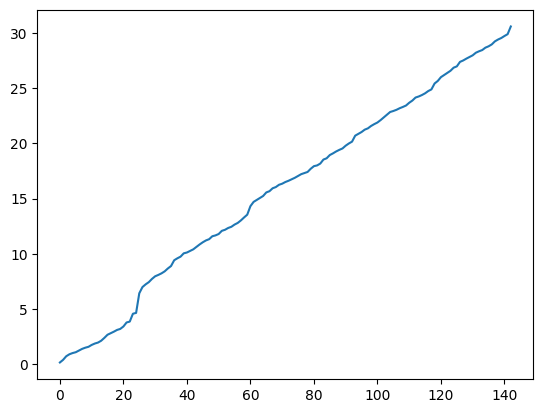

In [9]:
plt.plot(timestamps_list)

<Axes: >

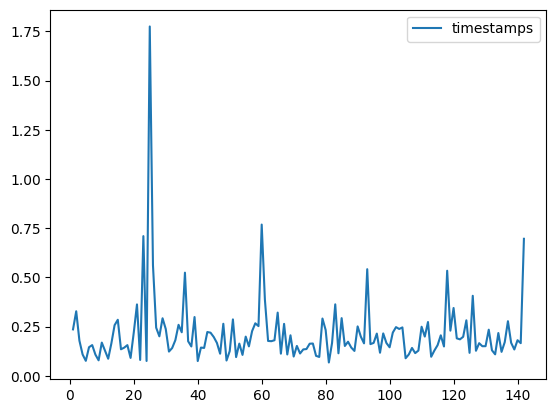

In [24]:

test.diff().plot()

In [25]:

np.std(test.diff())

/Users/azanella/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


timestamps    0.177521
dtype: float64

<Axes: >

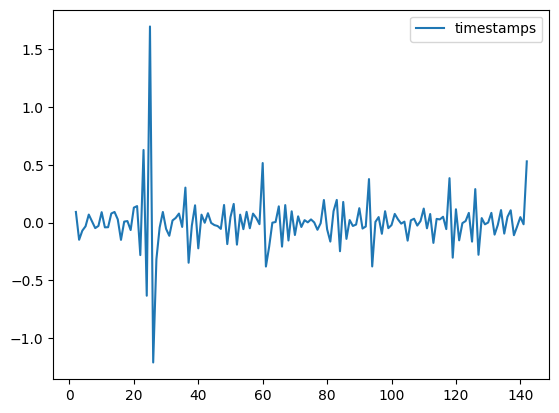

In [15]:
test.diff().diff().plot()

In [17]:
timestamps_list_2, nb_syllabes_2 = syllable_nulei_detection('/Users/azanella/Documents/repo_git/ai-hackatech/StudioVRAI/hackatech/raw-audio/QG_20230404144514_1_1071010_1342160_39370_43863.wav')

Extracting syllable intervals from '/Users/azanella/Documents/repo_git/ai-hackatech/StudioVRAI/hackatech/raw-audio/QG_20230404144514_1_1071010_1342160_39370_43863.wav'...


In [18]:
test_2 = pd.DataFrame({'timestamps': timestamps_list_2})

<Axes: >

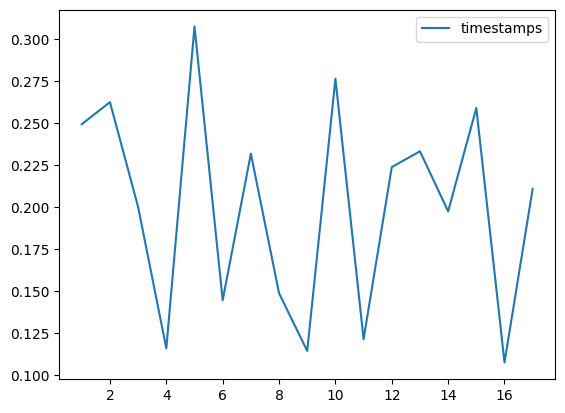

In [21]:

test_2.diff().plot()

<Axes: >

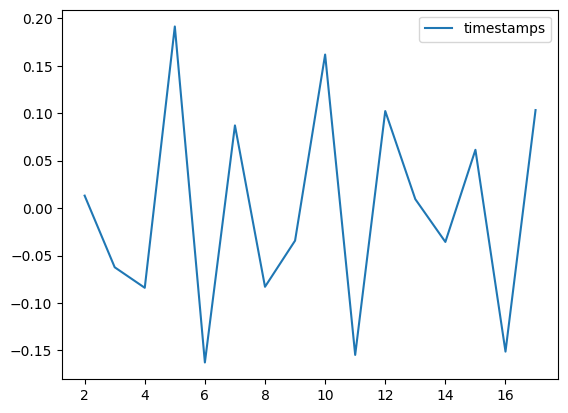

In [22]:

test_2.diff().diff().plot()

In [28]:
df = pd.read_csv('/Users/azanella/Documents/repo_git/ai-hackatech/tchatche_split_x_new.csv')

In [29]:
df

,file_name,rating,duration,transcript,speed,intensity_avg,intensity_std,intensity_min,intensity_max,pitch_avg,...,mfcc1_max,mfcc2_avg,mfcc2_std,mfcc2_min,mfcc2_max,nb_syllabes,pitch_mode,std_vitesses_syll,speed_syll,ecart_pitch
0,QG_20230404144514_1_1071010_1342160_1283_32095...,7,30.811774,La parole est à Madame Sandra Rogol pour le gr...,21.420383,61.986624,8.011046,38.471184,74.344699,277.552922,...,608.373617,-189.272256,80.048660,-400.907286,53.735662,143,268.794548,0.177521,4.641083,226.914867
1,QG_20230404144514_1_1071010_1342160_39370_4386...,8,4.493384,"En fait, toutes les personnes que vos réformes...",133.529662,58.555230,11.130439,40.060172,74.633179,257.859616,...,578.667946,-193.903590,70.654590,-363.756655,-18.703706,18,248.203017,0.061662,4.005890,136.583290
2,QG_20230404144514_1_1071010_1342160_74461_8730...,6,12.838239,On évalue à 8 à 10000000 le nombre de personne...,200.962142,62.371415,9.924436,35.941441,74.467563,276.012197,...,655.406787,-203.887754,79.779320,-392.417789,47.712070,63,228.365794,0.111225,4.907215,355.141322
3,QG_20230404144514_1_1071010_1342160_124958_130...,6,5.349266,Mettre en danger sanitaire et alimentaire la p...,112.164916,61.651891,7.341411,47.242503,73.520737,270.716905,...,557.193586,-174.619983,80.597447,-343.678773,19.960022,24,274.755224,0.082811,4.486597,197.418560
4,QG_20230404144514_1_1071010_1342160_144858_182...,8,37.230893,Vous seriez un peu plus crédible dans votre in...,45.123817,63.153302,7.400139,41.816996,73.855343,223.024390,...,582.499480,-212.057757,62.273174,-432.594033,-2.517094,186,199.137773,0.132196,4.995851,376.249384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,QG_20230606143049_1_4131660_4401170_9172_11901...,4,109.839912,Merci Madame la Présidente. Ma question s'adre...,50.254957,55.906207,10.019248,21.307589,73.525577,169.650055,...,660.628248,-154.019409,67.813250,-394.369863,98.831707,478,128.232970,0.153074,4.351788,470.348089
141,QG_20230606143049_1_4401170_4658940_9657_10173...,3,92.078959,"Monsieur le ministre de l'Industrie, je souhai...",42.354953,53.729482,14.080871,20.863504,74.807030,227.715132,...,590.002806,-150.646592,83.299204,-422.164288,114.628467,336,202.391501,0.212840,3.649042,286.429900
142,QG_20230606143049_1_4658940_4933650_10519_1257...,1,115.240779,"Merci Madame la Présidente, Madame la Première...",41.131273,55.534139,12.236728,21.047287,73.762018,318.873015,...,560.683494,-177.151921,81.668866,-496.680142,153.284505,474,333.818563,0.220948,4.113127,253.424203
143,QG_20230606143049_1_4933650_5188860_12476_1296...,1,117.186535,Merci Madame la Présidente. Ma question s'adre...,38.912321,55.641764,12.188877,24.091451,73.166007,246.145626,...,590.255354,-176.949404,73.751276,-405.402295,83.508661,513,237.279534,0.175118,4.377636,362.174797
